# Modeling and Simulation Project 1: Eriel and Mia

## What would Rwanda's population look like today had the Rwandan genocide not occurred?

In [20]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *


#We got this code from Allen Downey, just by the way :)

In order to answer this question, we must ask ourselves: what divergences are there between the actual observed population chart of Rwanda, and that of what it could have been? In this case, the "what it could have been" is repesented by a country with a similar population chart: Tanzania.

In the cell below, we use pandas to import previously downloaded data in the form of Excel spreadsheets. This data gives us the birth and death rates from 1960 to 2016 in Rwanda and Tanzania. We will assign each piece of data to an appropriate variable.

In [21]:
import pandas as pd
birthfile = 'data/birth_rate.xlsx'
deathfile = 'data/death_rate.xlsx'

birth_rate = pd.read_excel(birthfile)
rwanda_birth = birth_rate['Rwanda']
tanzania_birth = birth_rate['Tanzania']

death_rate = pd.read_excel(deathfile)
rwanda_death= death_rate['Rwanda']
tanzania_death= death_rate['Tanzania'];

Now, we will assign all these variables, as well as a start and end time, to two System objects, represented by the variables 'systemR' and 'systemT.'

In [22]:
systemR = System(
                birth = rwanda_birth,
                death = rwanda_death,
                current_pop = 2933000,
                t_0 = 1960,
                t_end = 2016)
systemR_2 = System(
                birth = rwanda_birth,
                death = rwanda_death,
                current_pop = 2933000,
                t_0 = 1960,
                t_end = 2016)
systemT = System(
                birth = tanzania_birth,
                death = tanzania_death);

We will now define a function that will update the population as time progresses, a function that plots our results, and a function that runs the entire simulation on loop.

In [23]:
def update_pop(system1, system2, t):
    """Update population function
    
    current_pop: current population
    newpop is returned so that we can plot things with it
    """
    if t in range(1984,2000): #if the years are between 1984 and 2000
        growth = (system2.birth[t]-system2.death[t])/1000 #creates a growth rate from Tanzania's birth and death rates
    else: #if the years are before 1984 or after 2000, creates a growth rate from Rwanda's birth and death rates
        growth = (system1.birth[t] - system1.death[t])/1000
    system1.current_pop = (1+growth)*system1.current_pop
    return system1.current_pop

In [24]:
title='Real vs. Hypothetical Rwandan Population Growth'
def plot_results(results1, results2, title):
    plot(results1, ':', label='World Bank Data')
    plot(results2, '--', label='Hypothetical Growth')
    decorate(xlabel='Year', 
             ylabel='Rwandan population (x10^7)',
             title=title)

In [25]:
def runSet(system1, system2, system3, update_pop):
    newpop_r = TimeSeries()
    newpop_t = TimeSeries()
    for t in linrange(system1.t_0, system1.t_end): #from 1960 to 2016
        newpop_r[t] = update_pop(system1, system1, t) #update Rwanda's population using systemR
        newpop_t[t] = update_pop(system2, system3, t) #update Rwanda's population hypothetically using systemR2 and systemT
    return newpop_r, newpop_t

# Results

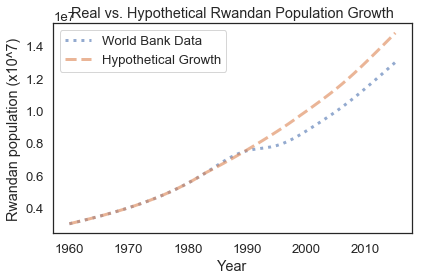

In [26]:
newr, newt = runSet(systemR, systemR_2, systemT, update_pop)
plot_results(newr, newt, title)

# Interpretation
Now that we have run our functions, we can see that the model compares Rwanda's actual population growth chart with a hypothetical chart based on that of Tanzania. During the years 1984 to just before 2000, we used Tanzania's growth rates instead of Rwanda's to model the expected growth rate of Rwanda had the genocide not occurred.

Tanzania and Rwanda had quite similar growth rates throughout most years in this graph, though we noticed deviation due to wartime-Rwanda between the years of 1984 and 2000, so our model accounted for that. The model fails to take into account information we could not find on the number of people who sought refuge during the Rwandan genocide, but it was still able to approximate the difference in population growth that Rwanda would have likely experienced, based on the similar growth rates of Tanzania, had the genocide not occurred.